In [1]:
%load_ext autoreload
%autoreload 2


## One dimensional Fokker-Plank equation



In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc

import animations


## Stochastic Differential equation

Let $X_t$ be a Stochastic process and $\mu(X_t, t)$ and $\sigma(X_t, t)^2$ be measurable functions, called the drift and variance respectively. A Stochastic differential equation can be written as

$$dX_t = \mu(X_t, t)dt + \sigma(X_t, t)dB_t$$

such that $B_t$ denotes a Wiener process (Standard Brownian Motion). Wiener process have the following properties

1. $B_0 = 0$ always.
2. All $B_t$ are independent random variables.
3. $B_{t+u} - B_{t} \sim N(0, u)$.
4. $B_t$ is a continuous random variable.

The Stochastic differential equation can be solved numerically using the Euler-Maruyama Scheme.

consider discrete time steps $\{t_i\}^N_{i=0}$ such that $t_i - t_{i-1} = \Delta t$. $X_{t_{i}}$ can be approximated by the following

$$X_{t_{i}} = X_{t_{i-1}} + \mu(X_{t_{i-1}}, t_{i-1}) \Delta t + \sigma(X_{t_{i-1}}, t_{i-1}) \Delta B_{t_{i-1}}$$

where $X_0 = x_0$ and $\Delta B_{t_{i}} \sim N(0, \Delta t)$.

## Fokker-Plank equation

Let the diffusion coefficient $D(X_t, t) = \frac{1}{2}\sigma(X_t, t)$ and p(x, t) be the probability density function of the random variable $X_t$ at time $t$. $p$ can be obtained by solving the Fokker-Plank equation, that is

$$\frac{\partial}{\partial t}p(x, t) = - \frac{\partial}{\partial x}\left[\mu(x, t)p(x, t)\right] + \frac{\partial^2}{\partial x^2}\left[D(x, t)p(x, t)\right]$$

## Example below

In the following example, consider constant drift and diffusion. So the Stochastic Differential equation is of the form

$$dX_t = \mu dt + \sqrt{2D} dB_t$$

where $X_0 = x_0$.

Let $p(x, t)$ be the PDF of X_t at $t>0$. $p$ can be obtained from

$$\frac{\partial}{\partial t}p(x, t) = -\mu \frac{\partial}{\partial x}p(x, t) + D\frac{\partial^2}{\partial x^2}p(x, t)$$

Let 

1. $\mu = -0.1$, denoted by the variable name `Convection`.
2. $D = 0.009$, denoted by the variable name `Diffusion`.
3. $X_0 = 0$, initial value of the SDE.

The Fokker-Plank equation can be solved using the finite difference method for the convection-diffusion equation. See source code `diffuconpy` to see the full implementation of the finite-difference method. Click [here](https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation) for more information on the Fokker-Plank equation.

## Stochastic Process

In [3]:
Diffusion = 0.009
Convection = -0.1

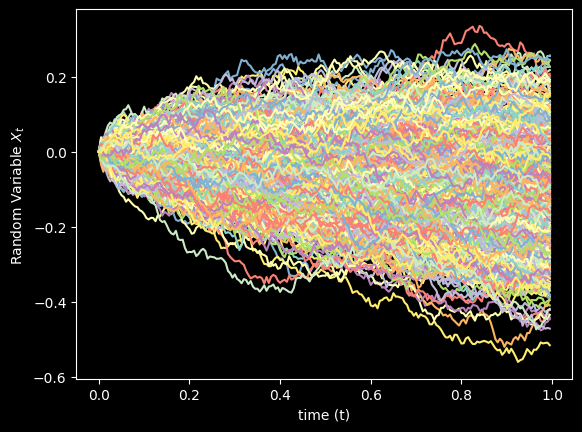

In [4]:
# Ito Process model driven by standard Wiener process

# number of simulations
nsim = 1000

# Number of partitions
N = 200
t = np.zeros(N)
X_t = np.zeros((nsim, N))
X_t[:, 0] = 0 # Initial value
dt = (1-0)/N

mu_c = Convection
sigma_c = np.sqrt(2*Diffusion)

# Drift
def mu(X, t):
    return mu_c

# Standard Deviation
def sigma(X, t):
    return sigma_c

# Brownian motion (denoted by B_t in the brief)
def dW(dt):
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))

for j in range(nsim):
    for k in range(0, N-1):
        t[k+1] = t[k] + dt
        x = X_t[j, k]
        X_t[j, k+1] = x + mu(x, t)*dt + sigma(x, t)*dW(dt)
        
    plt.plot(t, X_t[j])

plt.xlabel("time (t)")
h = plt.ylabel("Random Variable $X_t$")
h.set_rotation(90)
plt.show()

Thousands simulations of $X_t$

## Initialising the Convection Diffusion Model  

In [5]:
# Number of space and time steps
Nt = 199
Nx = 200

# Space and time step size
dt = (1-0)/Nt
dx = (2-(-2))/Nx

# Setting up the initial condition
x = np.arange(-2, 2, dx)

# Initial Array
sigma = 0.01
amp = 1

# Initial condition
init = amp*(1/np.sqrt(0.001*2*np.pi))*np.exp(-(1/2)*((x**2)/0.001))

## Boundary Conditions

### Dirichlet 

The Dirichlet boundary conditions take the following form

$$p(x_0, t) = p_0$$ 
$$p(x_1, t) = p_1$$

For all $t>0$ and boundary points $x_0$ and $x_1$. In this example, let $p_0 = p_1 = 0$. 


### Neumann

The Neumann boundary conditions are defined as

$$p^{\prime}(x_0, t) = p^{\prime}_0$$
$$p^{\prime}(x_1, t) = p^{\prime}_1$$

For all $t>0$. for this example, let $p^{\prime}_0 = p^{\prime}_1 = 0$, or say there is zero 'flux' in the boundary.

## Solving the PDE

In [6]:
def solve(Nt, Nx, dt, dx, Diffusion, Convection, init):
    FokkerPlank = dc.convection_diffusion_1dims(Nt, Nx, dt, dx, Diffusion, Convection, init)
    sol_Dirichlet = FokkerPlank.solve_Dirichlet(boundary=[0, 0])
    sol_Neumann = FokkerPlank.solve_Neumann(boundary_flux=[0, 0])

    return sol_Dirichlet.solution, sol_Neumann.solution

In [7]:
dirichlet, neumann = solve(Nt, Nx, dt, dx, Diffusion, Convection, init)

## Plotting the first time step

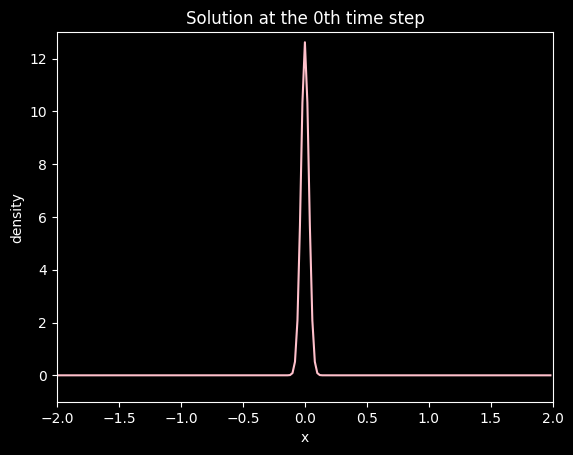

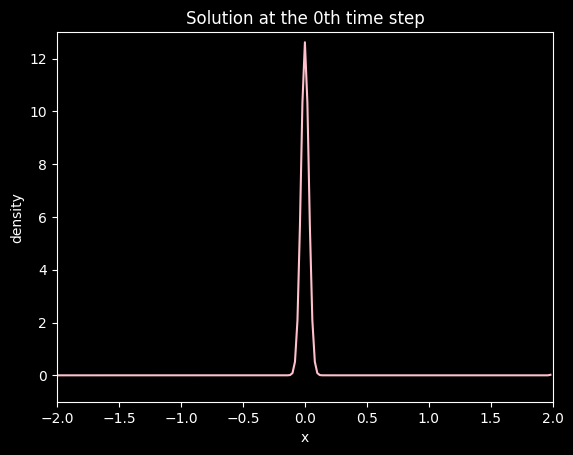

In [8]:
# Plotting the 0th time step state
plt.figure(0)
ax = plt.axes(xlim=(-2, 2), ylim=(-1, 13)) # left bound -5 and right bound 5
ax.plot(x, dirichlet[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

# Plotting the 0th time step state
plt.figure(1)
ax = plt.axes(xlim=(-2, 2), ylim=(-1, 13)) # left bound -5 and right bound 5
ax.plot(x, neumann[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

## Animating the Solution

In [10]:
# Setting up the animation
FPS = 60
FRN = 199
FILE_1 = './img/convection_diffusion_in_1_dimension_dirichlet.gif'
FILE_2 = './img/convection_diffusion_in_1_dimension_neumann.gif'

# Animation of PDFs
animations.animation_1(
    solution=dirichlet, 
    X=x, 
    xlab='X', 
    ylab='PDF', 
    title='Animation of PDF with Dirichlet BCs', 
    color='pink', 
    xlim_=(-2, 2), 
    ylim_=(-1, 13), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE_1
    )

animations.animation_1(
    solution=neumann, 
    X=x, 
    xlab='X', 
    ylab='PDF', 
    title='Animation of PDF with Neumann BCs', 
    color='pink', 
    xlim_=(-2, 2), 
    ylim_=(-1, 13), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE_2
    )

![convection_diffusion_in_1_dimension_dirichlet.gif](img/convection_diffusion_in_1_dimension_dirichlet.gif)

![convection_diffusion_in_1_dimension_neumann.gif](img/convection_diffusion_in_1_dimension_neumann.gif)

In both cases, the distribution starts from its initial state and under goes diffusion (gets squished) and drifts (convection) down the negative side of the axis.

In [11]:
FILE_3 = './img/Ito_Process_Histogram_dirichlet.gif'
FILE_4 = './img/Ito_Process_Histogram_neumann.gif'

# Animation of PDFs with histogram of Ito process
animations.animate_histogram(
    data=X_t, 
    solution=dirichlet,
    X=np.arange(-2, 2, dx),
    bins=100, 
    interval=100, 
    xlim=(-2, 2),
    xlab='$X_t$', 
    title='Histogram of Ito Process and PDF with Dirichlet BCs', 
    color='purple',
    color_curve='pink',
    fps=60, 
    frn=201, 
    filename=FILE_3
    )

animations.animate_histogram(
    data=X_t, 
    solution=neumann,
    X=np.arange(-2, 2, dx),
    bins=100, 
    interval=100, 
    xlim=(-2, 2),
    xlab='$X_t$', 
    title='Histogram of Ito Process and PDF with Neumann BCs', 
    color='purple',
    color_curve='pink',
    fps=60, 
    frn=201, 
    filename=FILE_4
    )

![Ito_Process_Histogram_dirichlet.gif](img/Ito_Process_Histogram_dirichlet.gif)


![Ito_Process_Histogram_neumann.gif](img/Ito_Process_Histogram_neumann.gif)

The PDF modeled by the Fokker Plank equation approximates the distribution of data modeled by $1000$ simulations of the Ito Process. Initially they do not match up, but sync up as each iteration goes on. This is due to the initial condition, saved in the variable `init`, is just an approximation of the Dirac delta function. so there is some (but very small) uncertainty at $t=0$ according to the model. Unlike the simulations that have no uncertainty at $t =0$, because $X_0 = 0$ and $B_0 = 0$.